## CS441: Applied ML - HW 1

### Parts 1-2: MNIST

Include all the code for generating MNIST results below

In [1]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats


def load_mnist():
  '''
  Loads, reshapes, and normalizes the data
  '''
  (x_train, y_train), (x_test, y_test) = mnist.load_data() # loads MNIST data
  x_train = np.reshape(x_train, (len(x_train), 28*28))  # reformat to 768-d vectors
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval  # normalize values to range from 0 to 1
  x_test = x_test/maxval
  return (x_train, y_train), (x_test, y_test)

def display_mnist(x, subplot_rows=1, subplot_cols=1):
  '''
  Displays one or more examples in a row or a grid
  '''
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

11490434/11490434 [==============================] - 0s 0us/step


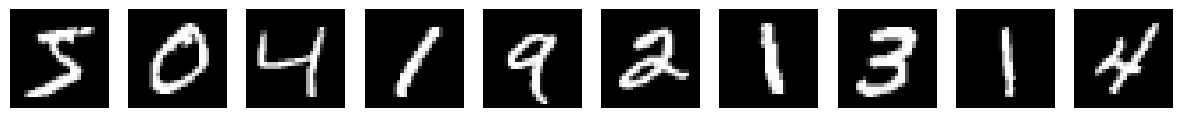

Total size: train=60000, test =10000


In [2]:
# example of using MNIST load and display  functions
(x_train, y_train), (x_test, y_test) = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, test ={}'.format(len(x_train), len(x_test)))

In [3]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

1. Retrieval, Clustering, and NN Classification

In [ ]:
# Retrieval

def get_nearest(X_query, X):
  ''' Return the index of the sample in X that is closest to X_query according
      to L2 distance '''
  # TO DO


j = get_nearest(x_test[0], x_train)
print(j)
j = get_nearest(x_test[1], x_train)
print(j)

In [ ]:
# K-means

def kmeans(X, K, niter=10):
  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''
  # TO DO -- add code to display cluster centers at each iteration also

K=30
centers = kmeans(x_train[:1000], K)



In [ ]:
# 1-NN

# TO DO


2. Make it fast

In [4]:
# install libraries you need for part 2
!apt install libomp-dev
!pip install faiss-cpu
import faiss
import time

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libomp-14-dev libomp5-14
Suggested packages:
  libomp-14-doc
The following NEW packages will be installed:
  libomp-14-dev libomp-dev libomp5-14
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 738 kB of archives.
After this operation, 8,991 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp5-14 amd64 1:14.0.0-1ubuntu1.1 [389 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp-14-dev amd64 1:14.0.0-1ubuntu1.1 [347 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libomp-dev amd64 1:14.0-55~exp2 [3,074 B]
Fetched 738 kB in 1s (954 kB/s)
Selecting previously unselected package libomp5-14:amd64.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../libomp5-14_1%3a14

In [ ]:
  # retrieval

# TO DO (check that you're using FAISS correctly)

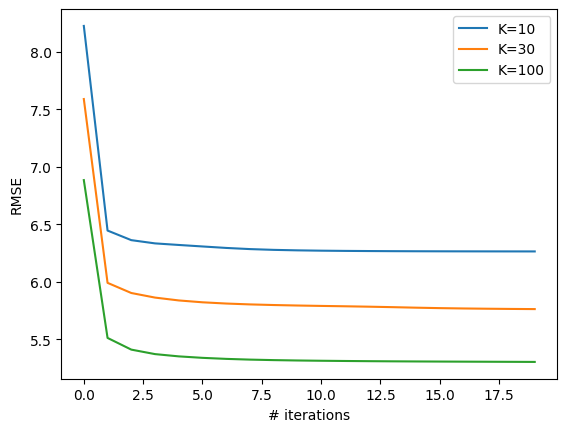

In [9]:
import faiss
import numpy as np
import matplotlib.pyplot as plt

def kmeans_fast(X, K, niter=10):
    X = X.astype(np.float32)
    d = X.shape[1]
    cluster_centers = X[:K].copy()
    index = faiss.IndexFlatL2(d)

    rmse_list = []

    for i in range(niter):
        index.reset()
        index.add(cluster_centers)
        D, I = index.search(X, 1)  # D is the squared distances
        rmse = np.sqrt(np.mean(D))  # Compute the RMSE from the squared distances
        rmse_list.append(rmse)

        for k in range(K):
            points_in_cluster = X[I.squeeze() == k]
            if len(points_in_cluster) > 0:
                cluster_centers[k] = np.mean(points_in_cluster, axis=0)

    return cluster_centers, rmse_list

# Assuming x_train is defined and is the correct input data
# You can now run the kmeans_fast function and plot the results
K = 10
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=10')

K=30
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=30')

K=100
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=100')
plt.legend(), plt.ylabel('RMSE'), plt.xlabel('# iterations')
plt.show()


In [ ]:
# 1-NN

nsample = [100, 1000, 10000, 60000]

# TO DO

plt.semilogx(nsample, 1-acc_exact, label='exact')
plt.semilogx(nsample, 1-acc_lsh, label='lsh')
plt.legend(), plt.ylabel('% error'), plt.xlabel('# training samples')
plt.show()

plt.semilogx(nsample, timing_exact, label='exact')
plt.semilogx(nsample, timing_lsh, label='lsh')
plt.legend(), plt.ylabel('time'), plt.xlabel('# training samples')
plt.show()


In [ ]:
# Confusion matrix
import sklearn

# TO DO

## Part 3: Temperature Regression

Include all your code used for part 2 in this section.  

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS441/24SP/hw1/"
  T = np.load(datadir + 'temperature_data.npz')
  x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target date
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()




In [ ]:
# load data
(x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()
''' Data format:
      x_train, y_train: features and target value for each training sample (used to fit model)
      x_val, y_val: features and target value for each validation sample (used to select hyperparameters, such as regularization and K)
      x_test, y_test: features and target value for each test sample (used to evaluate final performance)
      dates_xxx: date of the target value for the corresponding sample
      feature_to_city: maps from a feature number to the city
      feature_to_day: maps from a feature number to a day relative to the target value, e.g. -2 means two days before
      Note: 361 is the temperature of Cleveland on the previous day
'''
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))
baseline_rmse = np.sqrt(np.mean((y_val[1:]-y_val[:-1])**2)) # root mean squared error example
print('Baseline - prediction using previous day: RMSE={}'.format(baseline_rmse))

# plot first two x/y for val
plot_temps(x_val[0], y_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(x_val[1], y_val[1], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])



In [ ]:
# K-NN Regression

def regress_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Predict the target value for each data point in X_tst using a
  K-nearest neighbor regressor based on (X_trn, y_trn), with L2 distance.
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''
  # TO DO

def normalize_features(x, y, fnum):
  ''' Normalize the features in x and y.
      For each data sample i:
        x2[i] = x[i]-x[i,fnum]
        y2[i] = y[i]-x[i,fnum]
  '''
  # TO DO



# KNN with original features

# TO DO

# KNN with normalized features
fnum = 361 # previous day temp in Cleveland

# TO DO

# KNN with normalized features


## Part 5: Stretch Goals
Include all your code used for part 5 in this section. You can copy-paste code from parts 1-3 if it is re-usable.

In [ ]:
# Stretch: KNN classification (Select K)



In [ ]:
# Stretch: KNN regression (Select K)

In [ ]:
# Stretch: K-means (more iters vs redos)



In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# For use in Colab.  For local, just use jupyter nbconvert directly

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive/CS441/24SP/hw1" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_SP24_HW1_Solution.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")